In [1]:
using Plots

# Creating a Phase Diagram in Julia

In [2]:
# We devise a PVPython script that tells us the existance of a pore.
# The data we receive is in a text document of the form bool.

path = "C:\\Users\\gabey\\OneDrive\\Desktop\\Fall 2023\\SM Research\\Phase Diagram VTK Exports and PP\\Single Pore Round 1\\"
name1 = "IsPoreData.txt"
delimiter = ","
pop = "\n"
file = open(path*name1, "r")
strdata = readlines(file)

PoreTruex = []
PoreFalsex = []
PoreMaybex = []
PoreTruey = []
PoreFalsey = []
PoreMaybey = []
for line in strdata[begin+1:1:end]
    line = replace(line, pop => "")
    line = split(line, delimiter)
    line = [parse(Float64, line[1]), parse(Float64, line[2]), line[3] ]
    if occursin("None", line[3])
        push!(PoreMaybex, line[2])
        push!(PoreMaybey, line[1])
    else
        if occursin("True", line[3])
            push!(PoreTruex, line[2])
            push!(PoreTruey, line[1])
        elseif occursin("False", line[3])
            push!(PoreFalsex, line[2])
            push!(PoreFalsey, line[1])
        end
    end
end

print(PoreMaybex)

Any[6.0, 4.0, 14.0]

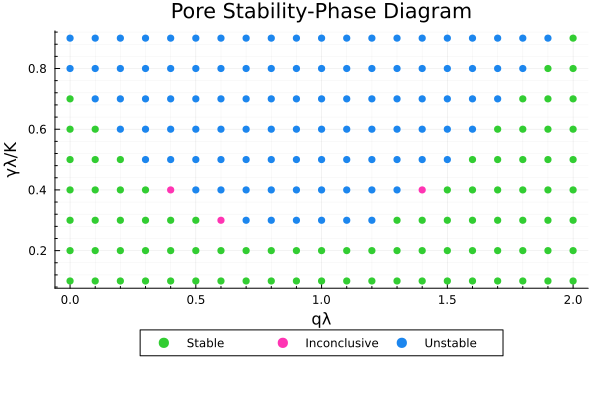

In [3]:
plt = scatter(PoreTruex/10,PoreTruey/10, label="Stable", markerstrokecolor="limegreen", markercolor="limegreen")
scatter!(plt, PoreMaybex/10, PoreMaybey/10, label="Inconclusive", markerstrokecolor="maroon1", markercolor="maroon1")
scatter!(plt, PoreFalsex/10,PoreFalsey/10, label="Unstable", markerstrokecolor="dodgerblue2", markercolor="dodgerblue2")
plot!(plt,title = "Pore Stability-Phase Diagram",minorgrid=true,legend=:outerbottom, legendcolumns=3, xlabel="qλ", ylabel="γλ/K")

In [4]:
savefig(path*"PD.png")

"C:\\Users\\gabey\\OneDrive\\Desktop\\Fall 2023\\SM Research\\Phase Diagram VTK Exports and PP\\Single Pore Round 1\\PD.png"